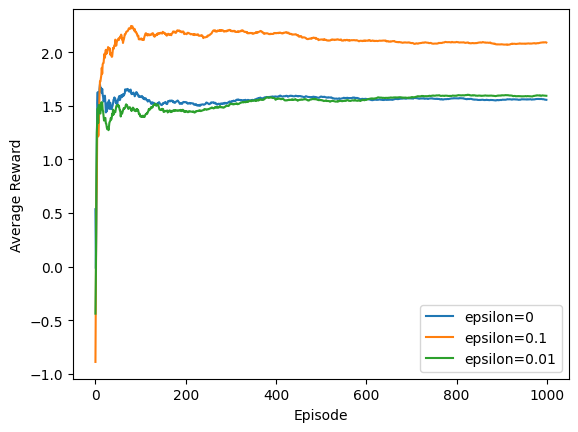

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# define the bandit problem with 10 arms
num_arms = 10
arms_mean = np.random.normal(0, 1, num_arms)

# define the epsilon-greedy algorithm
def epsilon_greedy(Q, epsilon):
    if np.random.uniform(0, 1) < epsilon:
        # select a random arm
        action = np.random.choice(num_arms)
    else:
        # select the arm with the highest estimated value
        action = np.argmax(Q)
    return action

# define the main function for running the bandit problem
def run_bandit(epsilon):
    # initialize the Q-values for each arm
    Q = np.zeros(num_arms)
    # initialize the counts for each arm
    N = np.zeros(num_arms)
    # initialize the total reward and the average reward per episode
    total_reward = 0
    avg_reward = np.zeros(1000)
    # run 1000 episodes
    for episode in range(1000):
        # select an action using the epsilon-greedy algorithm
        action = epsilon_greedy(Q, epsilon)
        # generate a reward for the selected arm
        reward = np.random.normal(arms_mean[action], 1)
        # update the Q-value for the selected arm
        N[action] += 1
        Q[action] += (reward - Q[action]) / N[action]
        # update the total reward and the average reward per episode
        total_reward += reward
        avg_reward[episode] = total_reward / (episode + 1)
    return avg_reward

# run the bandit problem for different values of epsilon
avg_reward_0 = run_bandit(0)
avg_reward_01 = run_bandit(0.1)
avg_reward_001 = run_bandit(0.01)

# plot the average reward per episode for each value of epsilon
plt.plot(avg_reward_0, label='epsilon=0')
plt.plot(avg_reward_01, label='epsilon=0.1')
plt.plot(avg_reward_001, label='epsilon=0.01')
plt.xlabel('Episode')
plt.ylabel('Average Reward')
plt.legend()
plt.show()


In [2]:
import numpy as np

def epsilon_greedy(k, epsilon, num_episodes, true_means):
    estimated_means = np.zeros(k)  # Estimated means of the bandit arms
    chosen_counts = np.zeros(k)  # Number of times each arm is chosen
    rewards = np.zeros(num_episodes)  # Total rewards per episode

    for episode in range(num_episodes):
        if np.random.rand() < epsilon:
            # Explore: Choose a random bandit arm
            action = np.random.randint(k)
        else:
            # Exploit: Choose the bandit arm with the highest estimated mean
            action = np.argmax(estimated_means)

        reward = np.random.normal(true_means[action], 1)  # Pull the chosen bandit arm
        rewards[episode] = reward

        # Update the estimated mean of the chosen arm
        chosen_counts[action] += 1
        estimated_means[action] += (1 / chosen_counts[action]) * (reward - estimated_means[action])

    # Print the estimated means of the bandit arms
    for i in range(k):
        print(f"Estimated mean for Bandit {i+1}: {estimated_means[i]}")

    # Print the total reward accumulated over episodes
    print(f"Total reward: {np.sum(rewards)}")

# Example usage
k = 10  # Number of bandit arms
epsilon = 0.1  # Exploration probability
num_episodes = 1000  # Number of episodes to run
true_means = [0.5, 0.3, 0.1, 0.8, 0.2,0.4,0.6,0.9,0.3,0.2]  # True means of the bandit arms

epsilon_greedy(k, epsilon, num_episodes, true_means)


Estimated mean for Bandit 1: 0.6313595933428169
Estimated mean for Bandit 2: 0.16809163580838848
Estimated mean for Bandit 3: -0.3933030783608357
Estimated mean for Bandit 4: 0.7795293519419597
Estimated mean for Bandit 5: 0.4282123369746109
Estimated mean for Bandit 6: 0.40250467569399917
Estimated mean for Bandit 7: 0.5691358025160755
Estimated mean for Bandit 8: 0.503396938885882
Estimated mean for Bandit 9: 0.19597362746823127
Estimated mean for Bandit 10: 0.23077624650474213
Total reward: 735.6326594020998


In [5]:
import numpy as np

def epsilon_greedy(k,epsilon,episodes,true_means):
  estimated_means=np.zeros(k)
  rewards=np.zeros(episodes)
  counts=np.zeros(k)

  for episode in range(episodes):
    if np.random.uniform(0,1)<epsilon:
      action=np.random.randint(k)

    else:
      action=np.argmax(estimated_means)
    
    counts[action]+=1

    reward=np.random.normal(true_means[action],1)
    rewards[episode]=reward

    estimated_means[action]+=(reward-estimated_means[action])/counts[action]

  for i in range(k):
    print(f"Estimated mean for bandit {i+1} = {estimated_means[i]}")
    
  print("Total Rewards=",np.sum(rewards))

k=10
epsilon=0.1
episodes=10000
true_means = [0.5, 0.3, 0.1, 0.8, 0.2,0.4,0.6,0.9,0.3,0.2]

epsilon_greedy(k,epsilon,episodes,true_means)

Estimated mean for bandit 1 = 0.3845330998752546
Estimated mean for bandit 2 = 0.25882268390163976
Estimated mean for bandit 3 = 0.032880496473971156
Estimated mean for bandit 4 = 0.7937304944336631
Estimated mean for bandit 5 = 0.2844106926267369
Estimated mean for bandit 6 = 0.3409921741342271
Estimated mean for bandit 7 = 0.5602995893957976
Estimated mean for bandit 8 = 0.8874813634932804
Estimated mean for bandit 9 = 0.19876126226449506
Estimated mean for bandit 10 = 0.2839932254811946
Total Rewards= 8260.628799694461


In [12]:
import numpy as np

def sarsa(k,epsilon,gamma,alpha,episodes,q_table,true_means):
  estimated_means=np.zeros(k)
  counts=np.zeros(k)
  rewards=np.zeros(episodes)

  for episode in range(episodes):
      if np.random.uniform(0,1)<epsilon:
        arm=np.random.randint(k)

      else:
        arm=np.argmax(estimated_means)

      reward=np.random.normal(true_means[arm],1)
      rewards[episode]=reward
      counts[arm]+=1
      q_table[arm,episode]+=alpha*(reward-q_table[arm,episode])
      estimated_means[arm]+=(reward-estimated_means[arm])/counts[arm]


  for i in range(k):
    print(f"Estimated reward for bandit {i+1} = {estimated_means[i]}")

  print(q_table)

  print("Total Reward=",np.sum(rewards))      

k=10
epsilon=0.1
gamma=0.99
alpha=0.1
episodes=10000
q_table=np.zeros((k,episodes))
true_means=np.random.normal(0,1,size=10)
sarsa(k,epsilon,gamma,alpha,episodes,q_table,true_means)

Estimated reward for bandit 1 = -0.5336926252853299
Estimated reward for bandit 2 = -0.585875586989548
Estimated reward for bandit 3 = -0.060549649770190714
Estimated reward for bandit 4 = -1.5927792113611872
Estimated reward for bandit 5 = -0.027232544753331013
Estimated reward for bandit 6 = 1.220493696270774
Estimated reward for bandit 7 = -0.8474348625754675
Estimated reward for bandit 8 = 0.4966440741527723
Estimated reward for bandit 9 = -0.4058653187995497
Estimated reward for bandit 10 = 0.8117697581802181
[[-0.06915597  0.          0.         ...  0.          0.
   0.        ]
 [ 0.         -0.19108739  0.         ...  0.          0.
   0.        ]
 [ 0.          0.         -0.03797917 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]
Total Reward= 10859.356788425699


In [13]:
import gym

gym.__version__

'0.25.2'